<div class="pagebreak"></div>

# Files

Files are one of the most ubiquitous abstractions for computers.  As users, we constantly interact with files to store our documents and other data.  We organize these files into directories (folders).  Directories can contain subdirectories to provide a hierarchical structure of various contents.  

As with other programming languages, Python provides comprehensive functionality to interact with files and directories. Interacting with files will also be necessary to allow us to persist data. So far, we have just used variables that hold data in the computer's memory - such data disappears when the program terminates.  By storing data in files, the information is placed (stored/persisted) on [secondary storage devices](https://en.wikipedia.org/wiki/Computer_data_storage#Secondary_storage) such as hard drives and USB sticks. 

We also use files to share data with other individuals and systems. Programmers have defined common formats such as tab-delimited, comma-separated values(CSV), and JavaScript Object Notation(JSON) to store data.

Pythonʼs view of files and directories derives from the Unix/Linux operating system variants.  [Overview of the Unix File System](https://web.archive.org/web/20210419161551/https://homepages.uc.edu/~thomam/Intro_Unix_Text/File_System.html)<br>
(You should know the material on the "Overview of the Unix File System" page.).  In Unix-like operating systems:
- Files are a primary means of data storage and manipulation in Unix-like systems. Files can be of various types, including regular files, directories, symbolic links, and more.
- A file is a named collection of data stored in a filesystem. It can contain text, binary data, or any other type of information.
- Even devices (e.g., hard drives, printers) and even some system-related information are treated as files.

Python's [`io`](https://docs.python.org/3/library/io.html) module provides support for files.


## Working with Files
To read or write files, follow these steps.
1. Open the file 
2. Read or write to the file
3. Close the file once you are finished.

Step1:<br>
To open a file, use the built-in function [open()](https://docs.python.org/3/library/functions.html#open)

```
f = open(filename, mode)
```
`open()` returns a file object.  By default (not specifying the mode argument), the Python Interpreter opens a file for reading as a text file. i.e., mode='rt'.  

Available modes:

| Character | Meaning
| :--------:|:-------|
'r'| open for reading (default)
'w'| open for writing, truncating the file first
'x'| open for exclusive creation, failing if the file already exists
'a'| open for writing, appending to the end of the file if it exists
'b'| binary mode.  Specify in conjunction with 'r', 'w', 'x', or 'a'
't'| text mode (default). Specify in conjunction with 'r', 'w', 'x', or 'a'
'+'| open for updating (reading and writing).  Rarely used. See [open()](https://docs.python.org/3/library/functions.html#open)


Step 2:<br>
Read or write data to the file as necessary

Step 3:<br>
Finally, call `close()` to notify the operating system and interpreter that we have finished processing the file. The operating system can then release any allocated resources.
```
f.close()
```

## Text Files
Python views text files as a continuous stream of a stream data. By default, Python assumes the text data is represented with Unicode and stored within UTF-8 encoded files  

### Creating a new text file
The following code block opens a file called "text.txt" in the current directory for writing text.  The code block shows two different ways of putting a string into the file. Finally, the last line closes the file.

In [3]:
f = open("test.txt", "wt")
print('String message, print built-function, but specify the file', file=f)
f.write('Another message, uses the write method of the file object')
f.write("test")
f.close()

If you examine the file in a text editor, you will notice the file contains:
```
String message, print built-function, but specify the file
Another message, uses the write method of the file objecttest
```
By default, `print()` adds a newline at the end of each call unless you specify a different value in the `end` parameter.

The `write()` method does not add any newline characters - you must add newlines manually as needed.

### Reading a text file
To read a text file, we can use several different methods
- `read()`
- `readline()`
- `readlines()`
- an iterator

`read()` with no arguments will read the entire contents of the file into a string.  As such, be careful with large files as you may exhaust the available memory in the computer.  

In [4]:
f = open("test.txt", "rt")
contents = f.read()
f.close()
print(contents)

String message, print built-function, but specify the file
Another message, uses the write method of the file objecttest


To limit the number of characters read from the file in one method call, you can specify the maximum number of characters to read at a time.

In [5]:
f = open("test.txt", "rt")
numCharacters = 20
message = ""
while True:
    text = f.read(numCharacters)
    if not text:    #string is empty, nothing else to read in the file
        break
    print(text,end="###")
    message += text
f.close()
print("\n\nNow, dispay the message:")
print(message)

String message, prin###t built-function, bu###t specify the file
A###nother message, uses### the write method of### the file objecttest###

Now, dispay the message:
String message, print built-function, but specify the file
Another message, uses the write method of the file objecttest


`readline()` will read one line at a time, returning the contents in a string. Any newline characters at the end remain in the returned string. When the end of the file arises, `readline()` returns an empty string. If a blank line exists, `readline()` returns a string with a newline character. This behavior allows a string variable to perform as a boolean in a condition check. If the string is non-empty (even just a newline), the string evaluates to `True`. If the string is empty, the string evaluates to `False` in a condition check.

In [6]:
f = open("test.txt", "rt")
while True:
    line = f.readline()
    if not line:    #string is empty, nothing else to read in the file
        break
    print(line)
f.close()

String message, print built-function, but specify the file

Another message, uses the write method of the file objecttest


Notice that in the above output, the newlines stored in the file stay in the returned string. If the newlines were stripped from the return value, it would not be possible to distinguish between an empty line and the end of the file.

`readlines()` will read the entire file contents at once, returning a list where each element is a line from the file. As with `readline()`, newline characters remain in the result.

In [7]:
f = open("test.txt", "rt")
lines = f.readlines()
f.close()
for line in lines:
    print(line.strip())    # stripe the newline character from the end of string 


String message, print built-function, but specify the file
Another message, uses the write method of the file objecttest


Probably the most conventional way to read a text file in Python is to use an iterator:

In [8]:
f = open("test.txt", "rt")
for line in f:
    print(line.strip())
f.close()

String message, print built-function, but specify the file
Another message, uses the write method of the file objecttest


As before, this method keeps newline characters in the returned string.

While we noted that not specifying a limit to the `read()` can lead to memory issues, the other methods may also have issues depending upon the presence of newline characters to split apart the data read.

## Closing Files Automatically
Unlike other programming languages, Python will close a file once it cannot reference the file object. For example, a function opened a file, and that function exited.  However, closing a file still serves two essential purposes:
1. Forces any remaining writes to be completed and “flushed” to the file. “Flushing” forces any internal buffers the Python Interpreter uses to send any remaining data to the operating system to be stored. For performance reasons, Python and other programming languages will use buffers when reading and writing data; the buffers require fewer calls to the operating system to manipulate files.
2. Clears any resources allocated to managing the open file

Utilizing the `with` statement, Python relies upon context managers to automatically take action when a code block is entered and then exited by automatically calling special methods `__enter__()` and `__exit__()`.

Using objects defined with a context manager can then take the form: 
<pre>
with <i>expression</i> as <i>variable</i>:
    <i>code block</i>
</pre>


In [9]:
with open("test.txt") as f:
    for line in f:
        print(line.strip())

String message, print built-function, but specify the file
Another message, uses the write method of the file objecttest


Behind the scenes, Python uses this equivalent code sequence:

In [10]:
f = open("test.txt")
f.__enter__()
for line in f:
    print(line.strip())
f.__exit__()             # closes the file

String message, print built-function, but specify the file
Another message, uses the write method of the file objecttest


## Binary Files
We primarily use text files during this course, but computer systems constantly utilize binary files (images, videos, executables, specialized data files, etc.).

We can read and write data to binary files using [bytes](https://docs.python.org/3/library/stdtypes.html#bytes-objects) and [bytearray](https://docs.python.org/3/library/stdtypes.html#bytearray-objects) objects.  Other APIs have extended these types to provide richer capabilities.

### Binary Example: IP Addresses

The following code fragment resolves a domain name into an IP address.  As you visit various websites on the Internet, the computer performs this resolution such that it can send your request to the appropriate server.

In this example, `socket.gethostbyname()` returns a string representation of the IP address. [IPv4 addresses](https://en.wikipedia.org/wiki/IPv4#Addressing) are composed of 4 parts, each with a value between 0 and 255. So, a single byte represents each value; four bytes represent an IPv4 address. (It takes 8 bytes to represent an [IPv6 address](https://en.wikipedia.org/wiki/IPv6_address).) After printing out the value, the code converts it to bytes, an immutable sequence of byte values similar to a string. As such, for bytes, we can use indexes and slices just as we can with strings, tuples, and lists.

When displaying byte string literals, Python will display an ASCII value if a number converts to a printable ASCII character. Otherwise, it shows the number as a hexadecimal value. Recall that in one of the earlier notebooks, we presented the built-in function `chr()` to convert a number to the corresponding Unicode character. (ASCII characters are the same as the first 127 characters of Unicode.)

In [11]:
import socket
addr = socket.gethostbyname('wsj.com')
print(addr)
ba = socket.inet_aton(addr)
print(ba)
print(ba[-1])
print(chr(ba[0]), chr(ba[1]), chr(ba[2]), chr(ba[3]))

18.155.173.124
b'\x12\x9b\xad|'
124
  ­ |


### Writing to a Binary File

In [12]:
with open("test_binary.dat", 'wb') as f:
    f.write(ba)

### Reading from a Binary File

In [13]:
with open("test_binary.dat", 'rb') as f:
    ip_address = f.read()
print(ip_address)
print(type(ip_address))
print(socket.inet_ntoa(ip_address))    # convert the byte array to a string representation

b'\x12\x9b\xad|'
<class 'bytes'>
18.155.173.124


##  Tricky Issues

### Newline Characters
One of the common issues when dealing with text files is that different platforms use different characters to signify a new line.  On Linux and macOS, newlines are represented with just the bytecode `0x0a <LF> \n` while on Windows, `0x0d0a <CR><LF> \r\n` represents a new line. 

Within Python 3, the `open()` function has a parameter `newline` that controls how newlines are processed when reading text files.  By default, universal newlines are enabled.  In this mode, lines can end with `\n`, `\r`, or `\r\n`.  Python will translate all these to `\n` before returning a value to the caller.   

When writing output to a file, any `\n` characters are translated to the system default line separator, `os.linesep`, as the program writes output to a file.

### Encodings
Frequently, individuals can create text files with different encodings to store text for special characters (i.e., any characters that are not ASCII). By default, Python uses UTF-8 to encode files. However, you may run across files stored in a different encoding (yes, Windows strikes again). You will need to figure out the correct encoding and then open the file by specifying the encoding argument to open() with the correct value.

In [14]:
with open("data/PakistanSuicideAttacks.csv") as f:
    for line in f:
        print(line.strip())

S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,Location,Location Category,Location Sensitivity,Open/Closed Space,Influencing Event/Event,Target Type,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
1,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,N/A,Islamabad,33.718,73.0718,Capital,Egyptian Embassy,Foreign,High,Closed,,Foreigner,None,14,15,,60,2,,,15.835,60.503
2,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,,N/A,Karachi,24.9918,66.9911,Sindh,office of Nawa-e-Waqt,Office Building,Low,Closed,,Media,None,,3,,3,1,,,23.77,74.786
3,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,,7:45 AM,Karachi ,24.9918,66.9911,Sindh,Pakistan Navy bus Parked outside Five Star Sheraton Hotel ,Hotel,Medium,Closed,,Foreigner,Christian,13,15,20,40,1,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil Hospital Karachi 3. PN Shif

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 2734: invalid start byte

We can use the `chardet` module to detect the type.  (Installing this if necessary)

In [15]:
%pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [16]:
import chardet
with open("data/PakistanSuicideAttacks.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [17]:
with open("data/PakistanSuicideAttacks.csv",encoding='Windows-1252') as f:
    for line in f:
        print(line.strip())

S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,Location,Location Category,Location Sensitivity,Open/Closed Space,Influencing Event/Event,Target Type,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
1,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,N/A,Islamabad,33.718,73.0718,Capital,Egyptian Embassy,Foreign,High,Closed,,Foreigner,None,14,15,,60,2,,,15.835,60.503
2,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,,N/A,Karachi,24.9918,66.9911,Sindh,office of Nawa-e-Waqt,Office Building,Low,Closed,,Media,None,,3,,3,1,,,23.77,74.786
3,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,,7:45 AM,Karachi ,24.9918,66.9911,Sindh,Pakistan Navy bus Parked outside Five Star Sheraton Hotel ,Hotel,Medium,Closed,,Foreigner,Christian,13,15,20,40,1,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil Hospital Karachi 3. PN Shif

### Preferred Encoding 
To see the preferred encoding for our current platform / operating system, we can use the `locale` module and `getprefferredencoding()`

In [18]:
import locale
locale.getpreferredencoding() 

'UTF-8'

## Standard Streams: `stdin`, `stdout`, and `stderr`
Streams represent a flow of data in Unix/Linux operating systems. Being implemented in C, Python utilizes the three standard streams defined in that language and ubiquitous in Unix/Linux operating systems to interact with the outside world:

### Standard Input: `stdin`
- `stdin` is the default input stream where a Python program reads data from.
- By default, the `input()` function allows developers to read input from `stdin`.
- When you run a Python script from the command line and type something, it's reading from stdin

In [19]:
name = input("Enter your name: ")
print("Hello,", name)

Enter your name:  Steve


Hello, Steve


### Standard Output: `stdout`
- `stdout` is the default output stream where a Python program writes its regular output.
- Use the `print()` function to write to stdout.
- By default, running a Python script in a terminal or console, the output is displayed on the screen.










In [20]:
print("Hello, World!")

Hello, World!


### Standard Error: `stderr`
- `stderr` is used for error messages and diagnostics.
- Write error messages to stderr using the `print()` function with the file parameter set to `sys.stderr`  
  [`sys`](https://docs.python.org/3/library/sys.html) is a special Python module that allows programs to interact with the environment and interpreter.
- Using a separate stream for error messages avoids interference with the regular output.

In [21]:
import sys

print("Info: now starting transfer", file=sys.stderr)

Info: now starting transfer


### Terminal Usage
When running Python scripts from a terminal (shell)  or command prompt, you can use input from the keyboard, and the output and error messages are displayed in the terminal. You can also redirect these streams to/from files or other programs using shell commands.

To redirect `stdin` from a file:
```bash
python script.py < input.txt
```

To redirect `stdout` to a file:
```bash
python script.py > output.txt
```

To redirect `stderr` to a file:
```bash
python script.py 2> errors.txt
```

To redirect both `stdout` and `stderr` to the same file:
```bash
python script.py > output.txt 2>&1
```

To further explain `2>&1`:
- `2`: This is a file descriptor representing the standard error stream (stderr). In Unix-like systems, file descriptors are numbers associated with input and output streams. By convention, 0 represents standard input (`stdin`), 1 represents standard output (`stdout`), and 2 represents standard error (`stderr`).

- `>`: This symbol is used for output redirection. It tells the shell to take the output from the left side of the > symbol and redirect it to the location specified on the right side.

- `&`: This symbol is used to indicate that what follows is a file descriptor number (e.g., 2 for `stderr`) rather than a regular file.

- `1`: This is another file descriptor number, which represents standard output (`stdout`).

So, when you see `2>&1` in a command, it means "redirect `stderr` (file descriptor 2) to the same location as stdout (file descriptor 1)." In other words, it merges the error messages (`stderr`) with the regular output (`stdout`), and both will be sent to the same destination. We often use this to capture both normal output and error messages in the same output stream.

To append output to an existing file, use `>>`:
```bash
python script.py >> output.txt
```

Understanding and manipulating these standard streams is crucial for handling input, displaying output, and managing errors in Python programs, especially when dealing with command-line scripts and text-based user interfaces.

## File Case Study: DJIA Returns and Statistics
The following code reads a file containing the returns for the Dow Jones Industrial Average (DJIA) from 1886 to mid-2022.  This file uses a [comma-separated values](https://en.wikipedia.org/wiki/Comma-separated_values) (CSV) format to store the year and return fields. In this format,  a comma separates fields, and a newline separates records. Optionally, a header row may be present with the field names as the first row.
<pre>
Year,Return
2022,-8.6
2021,18.73
2020,7.25
2019,22.34
2018,-5.63
</pre>
This file format is relatively standard despite minor shortcomings, non-standard versions, and flawed parsers (Microsoft Excel). The format is especially problematic with fields containing commas or newlines.

Python does contain a [csv module](https://docs.python.org/3/library/csv.html) that you should use rather than trying to parse records yourself.  Another option for many data science  projects is to use the `read_csv()` function in [pandas](https://pandas.pydata.org/) - this toolset will be covered in later notebooks. Both capabilities handle many of the more challenging situations (dealing with strings containing commas and newlines) when parsing CSV files.

This code uses two [parallel arrays](https://en.wikipedia.org/wiki/Parallel_array) to track the data.  This approach is not best practice and is generally discouraged. As practice, you should rewrite this code using a dictionary where the key is the year, and the value is the percentage return.

The code below computes many descriptive statistics. Try creating functions for these. The functions should have a single parameter, a list(sequence) of values. Also, try computing the [first quartile, third quartile, and quartile range](https://en.wikipedia.org/wiki/Interquartile_range).

### Read and Parse the File

In [22]:
returns = []
years   = []
with open("data/djia_returns_1886_2022.csv") as f:
    headerline = f.readline()
    for line in f:
        split_line = line.strip().split(",")
        years.append(int(split_line[0]))
        returns.append(float(split_line[1]))

### Computing Descriptive Statistics

In [23]:
returns_sorted = sorted(returns)
total = sum(returns)
mean  = total / len(returns)
median = returns_sorted[len(returns)//2] if len(returns_sorted)%2 == 1 else (returns_sorted[len(returns)//2 -1 ] + returns_sorted[len(returns)//2])/2
print ("Mean(average):",mean)
print ("Median:",median)
print ("Min:", returns_sorted[0])
print ("Max:", returns_sorted[-1])
print ("Range:", returns_sorted[-1] - returns_sorted[0] )

Mean(average): 7.029416058394162
Median: 7.01
Min: -52.67
Max: 81.66
Range: 134.32999999999998


In [24]:
dif = 0
for x in returns:
    dif += (mean-x)**2
population_variance = dif/len(returns)
std_dev = population_variance**.5
print ("Population Variance:", population_variance)
print ("Population Standard Deviation:",std_dev) 

Population Variance: 409.51651936704127
Population Standard Deviation: 20.236514506382793


### Basic Analysis
There are many questions we can ask about this data.  For instance, when did the DJIA have its best return?  Worst return?

In [25]:
max_year_index = returns.index(returns_sorted[-1])
print("Best year:", years[max_year_index])
print("Worst year:", years[returns.index(returns_sorted[0])])

Best year: 1915
Worst year: 1931


### Distribution
Here we use a visualization library, [seaborn](https://seaborn.pydata.org/), to see the distribution of returns using a histogram. 

[Text(0.5, 0, 'Percentage Return'), Text(0, 0.5, 'Count')]

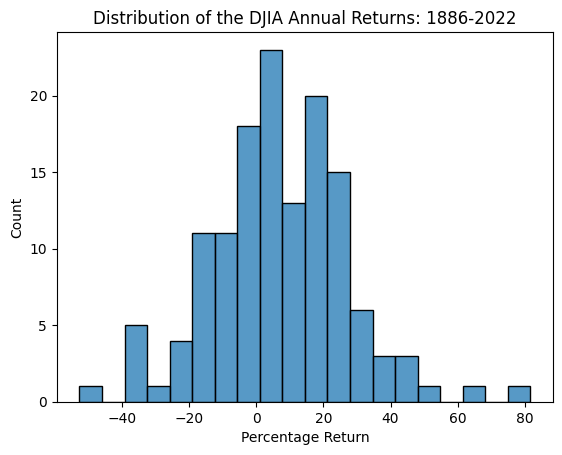

In [26]:
import seaborn as sns
axes = sns.histplot(returns,bins=20)
axes.set_title("Distribution of the DJIA Annual Returns: 1886-2022")
axes.set(xlabel='Percentage Return', ylabel='Count')

It is not hard to create visualizations when you can reuse code modules developed by others. The complicated part with many visualizations is simply getting data into the expected data format for the library.

## Suggested LLM Prompts

- Explain the basic file operations in Python, such as opening, reading, writing, and closing files. 
  Provide examples of how to use the open() function and the various modes (e.g., 'r', 'w', 'a', 'x'). 
  Cover error handling and exception handling when working with files.  (Note: error and exception handling will be covered in a later notebook)
- Demonstrate how to read and write text files in Python using the `read()`, `readline()`, `readlines()`, `write()`, 
  and `writelines()` methods. Provide examples of reading and writing different types of text files (e.g., .txt, .csv, .md).
- Explain how to work with binary files in Python, such as images, audio files, or executable files. 
  Provide examples of reading and writing binary data using the 'rb' and 'wb' modes, and the `read()` and `write()` 
  methods with the appropriate byte handling.
- Introduce the concept of context managers (`with` statement) for file handling in Python. Demonstrate how to use 
  the with statement to automatically handle opening and closing files, ensuring proper resource management.
- Introduce the concept of working with temporary files and directories in Python using the tempfile module. 
  Provide examples of creating, using, and securely cleaning up temporary files and directories.
- Explain the standard streams in Linux environments.  Provide examples both how that can be 
  used from the command-line and from within Python programs.

## Review Questions

1. What is the purpose of the `open()` function in Python, and what are the different modes you can use with that function? What is the default mode?
2. What is the difference between the read(), readline(), and readlines() methods when reading a file? 
3. Explain how to use the file object as an iterator to read data from a text file.
4. Which reading method(s) should be used to read large files?
5. How do you write data to a file in Python? Explain the steps.
6. What is the purpose of the `with` statement when working with files, and how does it help with resource management?
7. Should resources be left open to optimize execution speed? Discuss possible tradeoffs.
8. How do you open a file in append mode, and what does it allow you to do?
9. Compare and contrast the `print()` and `write()` functions.
10. How do you read and write binary data to a file in Python?

[answers](answers/rq-17-answers.md)

## Exercises 
1. Write a method named `blastoff` with two parameters: filename and countdown.  Countdown is a positive integer.  Using a range function, write a file that looks like 10 9 8 7 6 5 4 3 2 1---BlastOff

2. Write a method names `sum_blastoff_file` with one parameter - filename. The function reads a file produced by the previous exercise.  It will read all the numbers and produce their sum, printing the result to the console.

3. Given these stocks in some series of files, which stock had the largest monetary day gain, which had the biggest % change (gain or loss).  Which has performed the best since its inception?   We have provided four files in the data directory: AAPL.csv, GME.csv, SPY.csv, and TSLA.csv.  

